In [59]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [60]:
## input data = array of all dimensions 
## example of imput data --> [[1,2],[2,1]..] || [[1,2,3],[4,5,6]..]  ... 



def sphere(data):
    data = np.sum(np.power(data, 2))
    return data

def schwefel(data):
    x = np.sin(np.sqrt(np.abs(data)))
    data = 418.9829 * 10 - np.sum(data * x)
    return data

def ackley_03(data):
    x = np.cos(2 * np.pi * data)
    sum = np.sum(np.power(data,2))
    data = -20 * np.exp(-0.2 * np.sqrt((1/10) * sum)) - np.exp((1/10) * np.sum(x)) + 20 + np.exp(1)
    return data

def ackley_03(data):
    x = np.cos(2 * np.pi * data)
    sum = np.sum(np.power(data,2))
    data = -20 * np.exp(-0.2 * np.sqrt((1/10) * sum)) - np.exp((1/10) * np.sum(x)) + 20 + np.exp(1)
    return data

def schwefel_02(data):
    result = []   
    n = len(data[0])
    for i in range(len(data)):
      result.append((418.9829*n) - (np.sum( data[i] * np.sin( np.sqrt( np.abs( data[i] ))))))  
    return result

def schwefel_an(data):
    x = np.sin(np.sqrt(np.abs(data)))
    data = 418.9829 * 10 - np.sum(data * x)
    return data

def sum_squared(data):
    result = []
    for i in range(len(data)):
      n = len(data[i])
      j = np.arange( 1., n+1 )
      result.append(np.sum(j*np.power(data[i],2)))  
    return result

def rastrigin_03(data):
    return 10*sum(np.power(data,2)-10*np.cos(data*2*np.pi))

def rastrigin_an(data):
    result = []
    for i in range(len(data)):
      n = len(data)
      result.append(10*n+sum(np.power(data[i],2)-10*np.cos([val*2*np.pi for val in data])))
    return result

def zakharov(data): 
    result = []
    for i in range(len(data)):
      n = len(data[i])
      j = np.arange( 1., n+1 )
      s2 = sum( j * data[i] ) / 2
      result.append(sum( np.power(data[i],2)) + np.power(s2,2) + np.power(s2,4))
    return result

def local_search_02(fun,lim_up,lim_down,dimension=2,iterations=1000,
                        num_neighbours=100,s_div=0.1):
    points_,generated_val,points_fval = [],[],[] 
    curr_best = start = np.random.uniform(lim_up,lim_down,(1,dimension))
    start_func = fun(start)
    for i in range(iterations):
        generated_val = []
        for j in range(num_neighbours):
            current_test = np.random.normal(curr_best,s_div) 
            while(True):
                if(((current_test>=lim_up).all() and (current_test<=lim_down).all())):
                    generated_val.append(current_test)
                    break
                else:
                    current_test = np.random.normal(curr_best,s_div)
        func_vals=np.array(list(map(fun,generated_val))).tolist()
        minimal_value=min(func_vals)
        if(minimal_value<start_func):
            curr_best = generated_val[func_vals.index(minimal_value)]
            start_func=minimal_value
        points_.append(curr_best)
        points_fval.append(start_func)
    return points_,points_fval

def hill_climber_02(fun,lim_up,lim_down,dimension=2,iterations=1000,
                        num_neighbours=100,s_div=0.1):
    points_,generated_val,points_fval = [],[],[] 
    curr_best = start = np.random.uniform(lim_up,lim_down,(1,dimension))
    start_func = fun(start)
    for i in range(iterations):
        generated_val = []
        for j in range(num_neighbours):
            current_test = np.random.normal(curr_best,s_div) 
            while(True):
                if(((current_test>=lim_up).all() and (current_test<=lim_down).all())):
                    generated_val.append(current_test)
                    break
                else:
                    current_test = np.random.normal(curr_best,s_div)
        func_vals=np.array(list(map(fun,generated_val))).tolist()
        minimal_value=min(func_vals)
        curr_best = generated_val[func_vals.index(minimal_value)]
        start_func=minimal_value
        points_.append(curr_best)
        points_fval.append(start_func)
    return points_,points_fval


# Funcion hill climber deriverd from 02

In [61]:
def hill_climber_03(algorithm, max_limit, min_limit, init,n=1000, dimensions=10):
    data = np.empty(0)
    result = []
    for i in range(dimensions):
        data = np.insert(data, i, init)
        data = np.where(data < min_limit, min_limit, data)
        data = np.where(data > max_limit, max_limit, data)
    alg_result = algorithm(data)
    for _ in range(n):
        normal_gaus_f = np.empty(0)
        for j in range(len(data)):
            normal_gaus = np.random.normal(data[j], ((max_limit - min_limit) / 100) * 3, 10)
            normal_gaus = np.where(normal_gaus < min_limit, min_limit, normal_gaus)
            normal_gaus = np.where(normal_gaus > max_limit, max_limit, normal_gaus)
            normal_gaus_f = np.append(normal_gaus_f, normal_gaus)    
        data = normal_gaus_f
        data_step = np.empty(0)
        for dim in range(dimensions):
            data1 = data[dim * 10 : (dim + 1) * 10]
            data2 = np.empty(0)
            for i in data1:
                data2 = np.append(data2, algorithm(i))
            data_dict = dict(zip(data1,data2))
            step = min(data_dict.items(), key=lambda x: x[1])
            data_step = np.append(data_step, step[0])
        data = data_step
        alg_result = algorithm(data)
        result.append(alg_result)
    return result

# Function Local Search derived from 02


In [62]:
def local_search_03(algorithm,max_limit, min_limit, init,dimensions =10,n=1000):
    result = []
    generated_data = np.empty(0)
    for i in range(dimensions):
        generated_data = np.insert(generated_data, i, init)
        generated_data = np.where(generated_data < min_limit, min_limit, generated_data)
        generated_data = np.where(generated_data > max_limit, max_limit, generated_data)
    alg_result = algorithm(generated_data)
    for _ in range(n):
        gaus_normal_f = np.empty(0)
        for i in range(len(generated_data)):
            mu = generated_data[i]
            sig = ((max_limit - min_limit) / 100) * 0.1
            gaus_normal = np.random.normal(mu, sig, 9)
            gaus_normal = np.insert(gaus_normal, 0, mu)
            gaus_normal = np.where(gaus_normal < min_limit, min_limit, gaus_normal)
            gaus_normal = np.where(gaus_normal > max_limit, max_limit, gaus_normal)
            gaus_normal_f = np.append(gaus_normal_f, gaus_normal)
        generated_data = gaus_normal_f
        generated_data_step = np.empty(0)
        for d in range(dimensions):
            generated_data1 = generated_data[d * 10 : (d + 1) * 10]
            generated_data2 = np.empty(0)
            for i in generated_data1:
                generated_data2 = np.append(generated_data2, algorithm(i))
            generated_data_dict = dict(zip(generated_data1, generated_data2))
            step = min(generated_data_dict.items(), key=lambda x: x[1])
            generated_data_step = np.append(generated_data_step, step[0])
        generated_data = generated_data_step
        if (alg_result > algorithm(generated_data)):
            alg_result = algorithm(generated_data)
        result.append(alg_result)     
    return result

# Function Simulated annealning

In [63]:
def simulated_annealing( algorithm, max, min, init,x=700, dimensions=10):
    function_res = []
    func_re = np.empty(0)
    generated_data = np.empty(0)
    for i in range(dimensions):
        generated_data = np.insert(generated_data, i, init)
        generated_data = np.where(generated_data < min, min, generated_data)
        generated_data = np.where(generated_data > max, max, generated_data)
    func_re = algorithm(generated_data)
    for i in range(1000):
        for _ in range(10):
            gaus_normal_f = np.empty(0)
            for i in range(len(generated_data)):
                gaus_normal = np.random.normal(generated_data[i], abs((x - 0.7 * i) / 150), 1)
                gaus_normal = np.where(gaus_normal < min, min, gaus_normal)
                gaus_normal = np.where(gaus_normal > max, max, gaus_normal)
                gaus_normal_f = np.append(gaus_normal_f, gaus_normal)
            neighbor = gaus_normal_f
            delta_fx = algorithm(neighbor) - algorithm(generated_data)
            if (delta_fx < 0):
                generated_data = neighbor
            if (algorithm(neighbor) < algorithm(func_re)):
                func_re = neighbor
            else:
                random_uniform = random.uniform(0, 1)
                pwr = np.power(np.e, - delta_fx / x)
                if (random_uniform < pwr):
                    generated_data = neighbor
        function_res.append(algorithm(func_re))
        x = x - 0.7 * i
    return function_res

# Functions for data vizualization

In [64]:
def show_dataframe(fun1,fun2,fun3):

    minimum = np.array([np.min(fun1), np.min(fun2), np.min(fun3)])
    maximum = np.array([np.max(fun1), np.max(hc_schwefell), np.max(sa_schwefell)])
    mean = np.array([np.mean(fun1), np.mean(hc_schwefell), np.mean(sa_schwefell)])
    median = np.array([np.median(fun1), np.median(hc_schwefell), np.median(sa_schwefell)])
    std = np.array([np.std(fun1), np.std(hc_schwefell), np.std(sa_schwefell)])
    labels = np.array(['Local Search', 'Hill Climber', 'Simulated Annealing'])

    data = np.vstack([labels, minimum, maximum, mean, median, std])
    df = pd.DataFrame(data)
    df = df.T
    df.columns = ['Function', 'Min', 'Max', 'Mean', 'Median', 'STD']
    return df  

def show_plot(fun1,fun2,fun3,limits_x=0,limits_y=0):
    plt.plot(fun1[0], label = 'Hill climber')
    plt.plot(fun2[0], label = 'Local search')
    plt.plot(fun3[0], label = 'Simulated annealing')
    plt.legend()
    plt.show()


# Limits for our functions

In [65]:
schwefel_limits = [-500,500,50]
rastrigin_limits = [-5.12,5.12,0]
spehere_limits = [-5.12,5.12,50]
sum_squared_limits = [-5.12,5.12,0]
zakharov_limits = [-5,10,2]
ackley_limits = [32.768, -32.768,4.5]


# Calling ls,hc,sa

In [66]:
hc_schwefell = []
hc_ack = []
hc_sphere = []
ls_schwefel = []
ls_ack = []
ls_sphere = []
sa_schwefell = []
sa_ack = []
sa_sphere = []

for i in range(30):
    sa_schwefell.append(simulated_annealing(schwefel, schwefel_limits[0], schwefel_limits[1],schwefel_limits[2]))
    sa_ack.append(simulated_annealing(ackley_03, spehere_limits[0], spehere_limits[1], ackley_limits[2]))
    sa_sphere.append(simulated_annealing(sphere, sum_squared_limits[0], sum_squared_limits[1], 4.5))
    hc_schwefell.append(hill_climber_03(schwefel, schwefel_limits[1], schwefel_limits[0], 50))
    hc_ack.append(hill_climber_03(ackley_03, rastrigin_limits[1], rastrigin_limits[0], 25))
    hc_sphere.append(hill_climber_03(sphere, rastrigin_limits[1], rastrigin_limits[0],4.5))
    ls_schwefel=local_search_03(schwefel, schwefel_limits[1], schwefel_limits[0], 50)
    ls_sphere=local_search_03(sphere, rastrigin_limits[1], rastrigin_limits[0],4.5)
    ls_ackley=local_search_03(ackley_03, rastrigin_limits[1], rastrigin_limits[0], 25)


# Final Data presentation

In [67]:
show_dataframe(ls_schwefel,hc_schwefell,sa_schwefell)

,Function,Min,Max,Mean,Median,STD
0,Local Search,3553.4791805219143,3792.019515952899,3554.3804140286306,3553.4791806831154,11.969762984153466
1,Hill Climber,2172.769953701444,3664.922400530494,2546.4575258177524,2404.164864698819,382.42148032199805
2,Simulated Annealing,2383.937414686082,2383.937414686082,2383.937414686082,2383.937414686082,0.0


In [68]:
show_dataframe(ls_ackley,hc_ack,sa_ack)

,Function,Min,Max,Mean,Median,STD
0,Local Search,1.219881183844862e-05,13.312298574940009,2.8772748258215644,2.4295008277608332e-05,4.449372609644443
1,Hill Climber,0.043224657007780554,3664.922400530494,2546.4575258177524,2404.164864698819,382.42148032199805
2,Simulated Annealing,13.274789927055439,2383.937414686082,2383.937414686082,2383.937414686082,0.0


In [69]:
show_dataframe(ls_sphere,hc_sphere,sa_sphere)

,Function,Min,Max,Mean,Median,STD
0,Local Search,4.4113010262201006e-11,201.27704223784488,20.106321264727143,7.75695431910914e-10,44.93879646569611
1,Hill Climber,0.000673826413468659,3664.922400530494,2546.4575258177524,2404.164864698819,382.42148032199805
2,Simulated Annealing,262.144,2383.937414686082,2383.937414686082,2383.937414686082,0.0


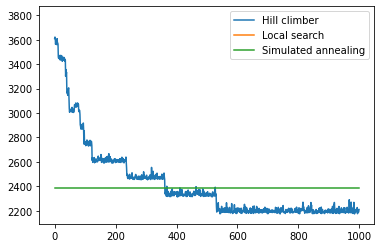

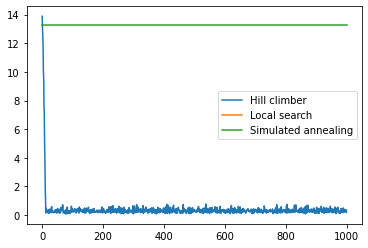

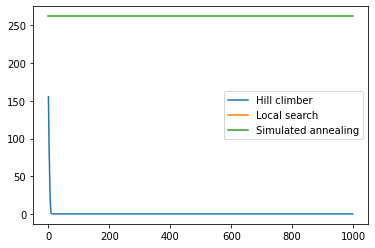

In [70]:
show_plot(hc_schwefell,ls_schwefel,sa_schwefell)
show_plot(hc_ack,ls_ackley,sa_ack)
show_plot(hc_sphere,ls_sphere,sa_sphere)